PART 2 - FINE TUNING

In the previous part, we used feature extraction for transfer learning, now we will be using fine tuning to do the same

In [89]:
#check gpu

!nvidia-smi

Fri Jul  7 16:47:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.25       Driver Version: 522.25       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8     3W /  N/A |   2884MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [90]:
# Get helper_functions.py script from course GitHub
#!python - m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

#code isnt working so we will download it manually
#saved as helper_functions.py

In [91]:
#Import helper fxns
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

Lets get Data!

This time lets use the tf.keras.applications and apply them to our own problem

Link: https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [92]:
#get 10 percent of training data of Food101 

# !python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# unzip_data("10_food_classes_10_percent.zip")

In [93]:
#check out the number of files, directories and their paths
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [94]:
#Create training dir and test dir

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

Earlier we used the ImageDataGenerator but now we will be using the Image Dataset Generator which is a newer and faster version of ImageDataGenerator. 

In [95]:
import tensorflow as tf

IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, #notice how we didnt maek any datgen instance
                                                                            image_size=IMAGE_SIZE,
                                                                            batch_size=32,
                                                                            label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(           test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.


Found 2500 files belonging to 10 classes.


In [96]:
train_data_10_percent #a batch dataset!

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [97]:
#check out the class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [98]:
#see an example of a batch
for images,labels in train_data_10_percent.take(1): #first batch
    print(images, labels) #our imaegs are now tensors

tf.Tensor(
[[[[1.73451691e+02 1.79451691e+02 2.05451691e+02]
   [1.69435104e+02 1.75435104e+02 2.01435104e+02]
   [1.64303085e+02 1.70303085e+02 1.96303085e+02]
   ...
   [1.19831169e+02 1.20831169e+02 1.41831177e+02]
   [1.20644936e+02 1.21644936e+02 1.42644928e+02]
   [1.21280617e+02 1.22280617e+02 1.43280624e+02]]

  [[1.71274704e+02 1.77274704e+02 2.03274704e+02]
   [1.68510681e+02 1.74510681e+02 2.00510681e+02]
   [1.66876602e+02 1.72876602e+02 1.98876602e+02]
   ...
   [1.18692657e+02 1.19692657e+02 1.40692657e+02]
   [1.20363838e+02 1.21363838e+02 1.42363846e+02]
   [1.20727371e+02 1.21727371e+02 1.42727371e+02]]

  [[1.69637115e+02 1.75637115e+02 2.01637115e+02]
   [1.70939728e+02 1.76939728e+02 2.02939728e+02]
   [1.68761322e+02 1.74761322e+02 2.00332748e+02]
   ...
   [1.16654274e+02 1.17654274e+02 1.38654266e+02]
   [1.24141449e+02 1.25141449e+02 1.46141449e+02]
   [1.22558372e+02 1.23558372e+02 1.44558380e+02]]

  ...

  [[2.00959778e+02 2.10959778e+02 2.37959778e+02]
   [2

Sequential API vs Functional API

So far we have only used the Sequential API to build models
Sequential API and Functional API are exactly the same in compiling and fitting the model, the code is the same
The difference comes in buildig the model where the functional API seems to be more flexible and able to produce more sophisticated models

MODEL 0: BUILDING OUR TRANSFER LEARNING MODEL WITH KERAS API FUNCTIONS (FEATURE EXTRACTION)

In [99]:
# 1. Create the base model with tf.keras.applications

base_model = tf.keras.applications.EfficientNetB0(include_top=False) #this is because we want to modify the first layer (orginal = 1000 neurons or classes but we have only 10 classes)

# 2. Freeze the model (so pre trained patterns remain)
base_model.trainable = False

# 3. Create the inputs into base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input layer")

# 4. If using ResNet50V2, we need to rescale or normalize our images, not needed in EfficientNet as its already done
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(input)

# 5. Pass inputs into the base model
x = base_model(inputs)
#check data shape after passing through the base model
print(f'Shape after base_model: {x.shape}')

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}") #this is basically our input layer turned into a vector format ((None, 1280))

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine inputs and outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())

# 10. Fit the model
history_10_percent = model_0.fit(train_data_10_percent,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs = 5,
            callbacks=[create_tensorboard_callback("transfer_learning", "MODEL_0_10_percent_feature_extract")])


Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/MODEL_0_10_percent_feature_extract/20230707-164749
Epoch 1/5
24/24 [==============================] - 19s 582ms/step - loss: 1.9401 - accuracy: 0.3747 - val_loss: 1.3446 - val_accuracy: 0.7268
Epoch 2/5
24/24 [==============================] - 12s 489ms/step - loss: 1.1207 - accuracy: 0.7787 - val_loss: 0.8766 - val_accuracy: 0.8288
Epoch 3/5
24/24 [==============================] - 11s 485ms/step - loss: 0.7854 - accuracy: 0.8320 - val_loss: 0.6993 - val_accuracy: 0.8460
Epoch 4/5
24/24 [==============================] - 11s 488ms/step - loss: 0.6358 - accuracy: 0.8667 - val_loss: 0.6057 - val_accuracy: 0.8584
Epoch 5/5
24/24 [==============================] - 12s 490ms/step - loss: 0.5454 - accuracy: 0.8893 - val_loss: 0.5521 - val_accuracy: 0.8636


In [100]:
#DAMNN 86 PERCENT ACCURACY!

#lets check out the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_5
1 rescaling_8
2 normalization_4
3 rescaling_9
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [101]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_8 (Rescaling)        (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_4 (Normalization  (None, None, None,   7          ['rescaling_8[0][0]']            
 )                              3)                                                   

In [102]:
#summary of whole model
model_0.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


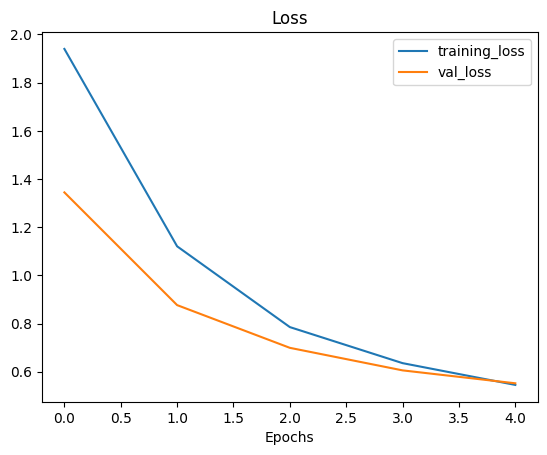

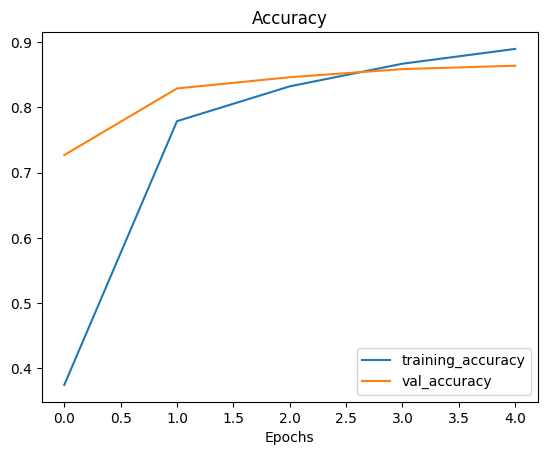

In [103]:
#lets plot the loss curves!

plot_loss_curves(history_10_percent)

## Getting the feature vector from a trained model

Lets demonstrate the GlobalAveragePooling2D Layer.
Our model after going through the base model turned into (None, 7, 7, 1280)
After the GlobalAveragePooling2D layer, it turned into (None, 1280)

Lets use a similar shaped tensor of (1, 4, 4, 3) and then pass it to the GAP2D

In [104]:
import tensorflow as tf
input_shape = (1, 4, 4, 3)

#set seed 
tf.random.set_seed(42)

#create the tensor
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor} \n")

#create the global average pooled tensor
#condenses the big vector into a simple feature tensor
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global Average pooled random tensor: \n {global_average_pooled_tensor}\n")

#lets try the global max pooling layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D Global Maxed Pooled random tensor: \n {global_max_pooled_tensor} \n")

#shape of different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of average pooled tensor: {global_average_pooled_tensor.shape}")
print(f"Shape of the max pooled tensor: {global_max_pooled_tensor.shape}")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D Global Average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]]

2D Global Maxed Pooled random tensor: 
 [[0.9058464 1.1603122 1.6994323]] 

Shape of input tensor: (1, 4, 4, 3)
Shape of average pooled tensor: (1, 3)
Shape of the max pooled tensor: (1, 3)


## Running a series of experiments!

1. Model_1 = Use feature extraction transfer learning with 1% of the training data  with data augmentation.
2. Model_2 = Use feature extraction transfer learning with 10% of the training data with data augmentation.
3. Model_3 = Use fine tuning transfer learning with 10% of the training data with data augmentation.
4. Model_4 = Use fine tuning transfer learning with **100%** of the training data with data augmentation. 

In [105]:
#Download the data -- preprocessed Food101 Data
!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")


Saved under 10_food_classes_1_percent (2).zip


In [106]:
#walk through the data
walk_through_dir("10_food_classes_1_percent") #training with only 7 images!

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [107]:
#Creating test and train dirs
train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [108]:
#data loaders
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding Data Augmentation directly into the model
We can use tf.keras.experimental.preprocessing()

Benefits of using this directly into the layers is that it will run on the GPU instead of the CPU so its much faster

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Create data_augmentation layer
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) #only for models like ResNet50V2 which dont have rescaling
], name="data_augmentation")

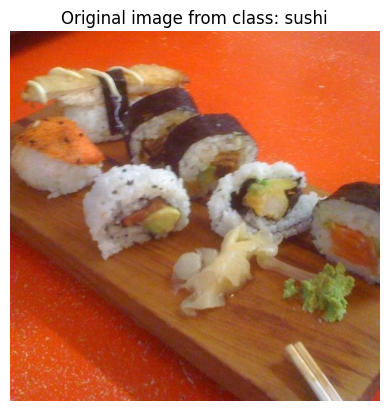

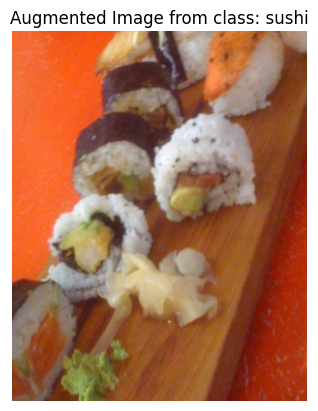

In [110]:
#Visualize our data aug layer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

#read the image
img = mpimg.imread(random_image_path)
plt.title(f"Original image from class: {target_class}")
plt.axis(False)
plt.imshow(img)

#now lets just plot the data augmented picture
augmented_img = data_augmentation(tf.expand_dims(img,axis=0), training=True)
plt.figure()
plt.title(f"Augmented Image from class: {target_class}")
plt.axis(False)
plt.imshow(tf.squeeze(augmented_img)/255.)

## Building Model 1

In [111]:
#set up input shape, freezing the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

#add in data aug
x = data_augmentation(inputs)

#Give base model the inputs (dont train it)
x = base_model(x, training=False)

#pool ouput features
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#put a dense layer as output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#make the model
model_1 = keras.Model(inputs, outputs)

#compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback("transfer_learning", "MODEL_1_1_PERCENT_DATA")])


Saving TensorBoard log files to: transfer_learning/MODEL_1_1_PERCENT_DATA/20230707-164916
Epoch 1/5
3/3 [==============================] - 22s 6s/step - loss: 2.4503 - accuracy: 0.0429 - val_loss: 2.2739 - val_accuracy: 0.1680
Epoch 2/5
3/3 [==============================] - 10s 5s/step - loss: 2.1706 - accuracy: 0.2286 - val_loss: 2.1401 - val_accuracy: 0.2404
Epoch 3/5
3/3 [==============================] - 10s 5s/step - loss: 1.9488 - accuracy: 0.3857 - val_loss: 2.0190 - val_accuracy: 0.3116
Epoch 4/5
3/3 [==============================] - 10s 5s/step - loss: 1.8319 - accuracy: 0.4714 - val_loss: 1.9145 - val_accuracy: 0.3796
Epoch 5/5
3/3 [==============================] - 10s 5s/step - loss: 1.5990 - accuracy: 0.6143 - val_loss: 1.8184 - val_accuracy: 0.4404


Accuracy of arnd 45% with only 7 images of same class is insanely impressive!

In [112]:
#model summary
model_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

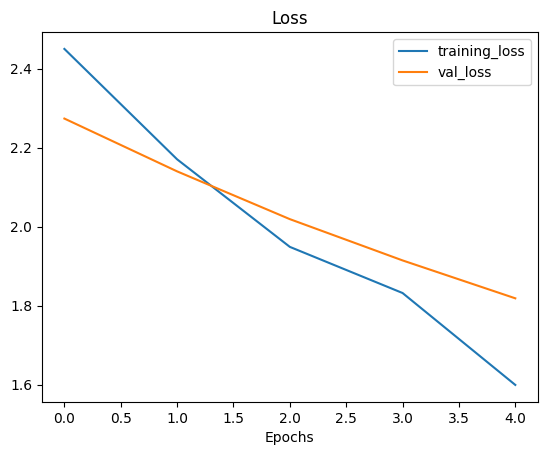

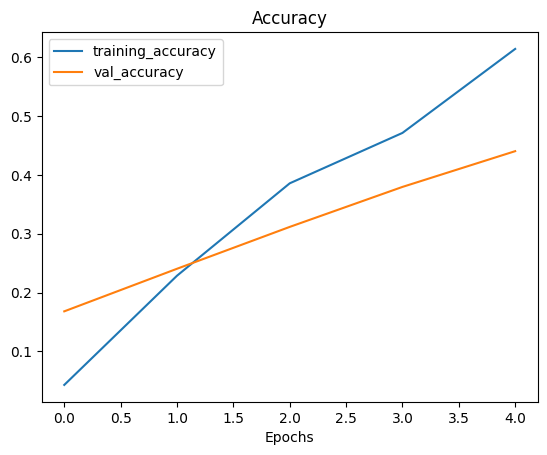

In [113]:
#loss curvesss
plot_loss_curves(history_1_percent)

## Building MODEL 2 - Feature Extraction transfer learning with 10 % of data and data augmentation

In [114]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [115]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size = (224,224),
                                                                 batch_size=32)

Found 750 files belonging to 10 classes.


In [116]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.Input(shape=input_shape,
                        name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, 
               training = False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, 
                       activation="softmax",
                       name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)
model_2.compile(loss="categorical_crossentropy",
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())


In [117]:
model_2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Creating a Model Checkpoint Callback

The model checkpoint callback intermediately saves our model (the full model or just the weights) during training. This is useful so we can come and start where we left off

In [118]:
# set a checkpoint path
checkpoint_path = "ten_percent_model_weights/checkpoint.ckpt"

#create a model checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     save_best_only=False,
                                                     save_freq="epoch", #save every epoch
                                                     verbose=1)
 

In [119]:
#fit the model
initial_epochs = 5
history_model_2 = model_2.fit(train_data_10_percent,
                                epochs = 5,
                                validation_data=test_data,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_steps=(0.25 * len(test_data)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "MODEL_2_10_PERCENT_DATA"),
                                           checkpoint_callback])


Saving TensorBoard log files to: transfer_learning/MODEL_2_10_PERCENT_DATA/20230707-165022
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9477 - accuracy: 0.3640
Epoch 1: saving model to ten_percent_model_weights\checkpoint.ckpt
24/24 [==============================] - 24s 664ms/step - loss: 1.9477 - accuracy: 0.3640 - val_loss: 1.4260 - val_accuracy: 0.6969
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2902 - accuracy: 0.6840
Epoch 2: saving model to ten_percent_model_weights\checkpoint.ckpt
24/24 [==============================] - 13s 549ms/step - loss: 1.2902 - accuracy: 0.6840 - val_loss: 1.0018 - val_accuracy: 0.8094
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0021 - accuracy: 0.7707
Epoch 3: saving model to ten_percent_model_weights\checkpoint.ckpt
24/24 [==============================] - 14s 569ms/step - loss: 1.0021 - accuracy: 0.7707 - val_loss: 0.8057 - val_accuracy: 0.8266
Epoch 4/5
24/24 [================

In [120]:
results_model_2 = model_2.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 0.6290 - accuracy: 0.8400


In [121]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 0.5521 - accuracy: 0.8636


[0.5521174073219299, 0.8636000156402588]

Well, it seems our model_0  was a bit better!

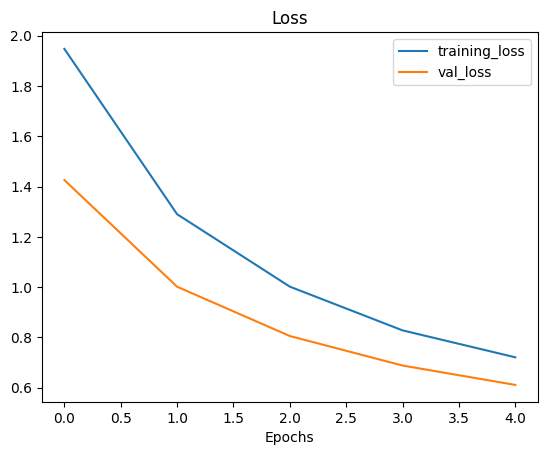

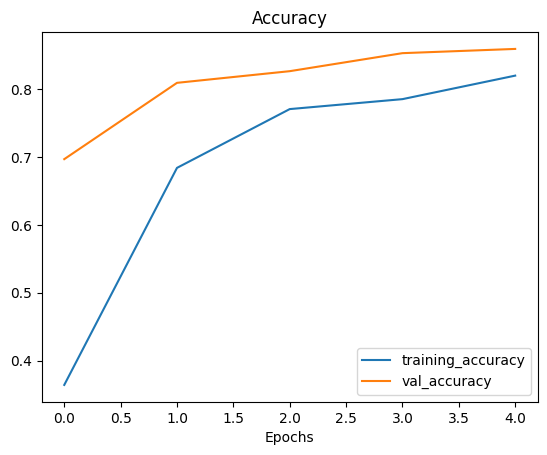

In [122]:
plot_loss_curves(history_model_2)

### Loading in Checkpointed Weights

Lets load in the checkpointed weights

In [123]:
#load in the saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [124]:
#evaluate the model_2 with loaded weights
model_2.evaluate(test_data)

79/79 [==============================] - 9s 113ms/step - loss: 0.6290 - accuracy: 0.8400


[0.6289944648742676, 0.8399999737739563]

The loaded weights and the before hand metrics for model 2 are almost the same. The difference comes just because of the way the numbers are stored in our computer. There is a slight difference only

## Creating Model 3
### Same as Model 2 but with Fine Tuning!

Fine tuning a model works best after we train a feature extraction model for a few epochs on large amounts of data.

In [125]:
#lets check out the layers in model2
model_2.layers

In [126]:
#lets check their trainability
for layer in model_2.layers:
    print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 False
global_average_pooling_layer True
output_layer True


In [127]:
#lets check how many layers in our base model (efficient net B0) are trainable?
print(len(model_2.layers[2].trainable_variables))

0


In [128]:
#same as our base model
print(len(base_model.trainable_variables))

0


In [129]:
#check all the layers of base model
for i, layer, in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

This is what we wanted! 
Remember when we created this model and we set the base_model trainable as False? This is it!
To fine tune this model, we need to unfreeze the top 10 layers (237-227) and continue our training for 5 more epochs.

In [130]:
base_model.trainable = True

#freeze all the layers except the last 10
for i,layer in enumerate(base_model.layers[:-10]):
    layer.trainable = False
    print(f"{i}:{layer.name} Trained {layer.trainable}")

#recompile the model (important: everytime we do a change in the model, we have to recompile it)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #general rule of thumb: whenever fine-tuning, its advised to lower the default learning rate by 10x
                metrics = ["accuracy"])

0:input_7 Trained False
1:rescaling_12 Trained False
2:normalization_6 Trained False
3:rescaling_13 Trained False
4:stem_conv_pad Trained False
5:stem_conv Trained False
6:stem_bn Trained False
7:stem_activation Trained False
8:block1a_dwconv Trained False
9:block1a_bn Trained False
10:block1a_activation Trained False
11:block1a_se_squeeze Trained False
12:block1a_se_reshape Trained False
13:block1a_se_reduce Trained False
14:block1a_se_expand Trained False
15:block1a_se_excite Trained False
16:block1a_project_conv Trained False
17:block1a_project_bn Trained False
18:block2a_expand_conv Trained False
19:block2a_expand_bn Trained False
20:block2a_expand_activation Trained False
21:block2a_dwconv_pad Trained False
22:block2a_dwconv Trained False
23:block2a_bn Trained False
24:block2a_activation Trained False
25:block2a_se_squeeze Trained False
26:block2a_se_reshape Trained False
27:block2a_se_reduce Trained False
28:block2a_se_expand Trained False
29:block2a_se_excite Trained False
30:bl

In [131]:
#lets check the layers
for i, layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [132]:
trainable_vars = model_2.trainable_variables
for i,var in enumerate(trainable_vars):
    print(i,var.name)

0 block7a_se_reduce/kernel:0
1 block7a_se_reduce/bias:0
2 block7a_se_expand/kernel:0
3 block7a_se_expand/bias:0
4 block7a_project_conv/kernel:0
5 block7a_project_bn/gamma:0
6 block7a_project_bn/beta:0
7 top_conv/kernel:0
8 top_bn/gamma:0
9 top_bn/beta:0
10 output_layer/kernel:0
11 output_layer/bias:0


In [133]:
#fine tune for more 5 epochs
fine_tune_epochs = initial_epochs + 5

#refit the model
history_model_3 = model_2.fit(train_data_10_percent,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=(0.25*len(test_data)), #testing on only 25 percent of test data.
                              initial_epoch=history_model_2.epoch[-1], #start training from the previously trained epoch
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="MODEL_3_FINE_TUNED_MODEL_2")])

Saving TensorBoard log files to: transfer_learning/MODEL_3_FINE_TUNED_MODEL_2/20230707-165208
Epoch 5/10
24/24 [==============================] - 23s 610ms/step - loss: 0.6232 - accuracy: 0.8293 - val_loss: 0.4846 - val_accuracy: 0.8672
Epoch 6/10
24/24 [==============================] - 13s 552ms/step - loss: 0.4747 - accuracy: 0.8613 - val_loss: 0.4514 - val_accuracy: 0.8625
Epoch 7/10
24/24 [==============================] - 13s 530ms/step - loss: 0.4272 - accuracy: 0.8707 - val_loss: 0.4197 - val_accuracy: 0.8750
Epoch 8/10
24/24 [==============================] - 13s 533ms/step - loss: 0.3898 - accuracy: 0.8867 - val_loss: 0.4287 - val_accuracy: 0.8609
Epoch 9/10
24/24 [==============================] - 12s 481ms/step - loss: 0.3384 - accuracy: 0.9093 - val_loss: 0.3734 - val_accuracy: 0.8875
Epoch 10/10
24/24 [==============================] - 13s 519ms/step - loss: 0.3054 - accuracy: 0.9160 - val_loss: 0.3941 - val_accuracy: 0.8734


In [134]:
results_model_3 = model_2.evaluate(test_data)

79/79 [==============================] - 10s 121ms/step - loss: 0.4343 - accuracy: 0.8572


Accuracy of 85 as compared to 84 of model 2. Its a bit of improvement!

In [136]:
#lets create a function to compare the results in a better way!
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two history models
    """ 
    #Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.36399999260902405, 0.6840000152587891, 0.7706666588783264, 0.7853333353996277, 0.8199999928474426, 0.8293333053588867, 0.8613333106040955, 0.8706666827201843, 0.8866666555404663, 0.909333348274231, 0.9160000085830688]


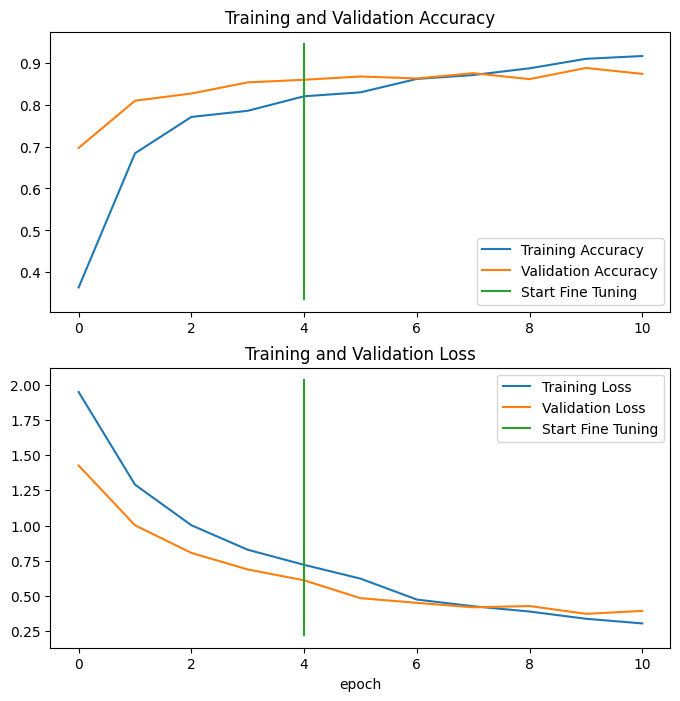

In [137]:
compare_historys(original_history=history_model_2, new_history=history_model_3)

## MODEL 4 - FINE TUNED MODEL ON 100% DATA

Now lets create the model on the entire 100% of data.

In [139]:
# Download and unzip 10 classes of data with all images
#!python - m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
#unzip_data("10_food_classes_all_data.zip")

In [141]:
train_all_data_dir = "10_food_classes_all_data/train/"
test_all_data_dir = "10_food_classes_10_percent/test/"

In [142]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [144]:


# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_all_data = tf.keras.preprocessing.image_dataset_from_directory(train_all_data_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.


In [145]:
#our model 3 (model 2 + fine tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 0.4343 - accuracy: 0.8572


[0.43433678150177, 0.857200026512146]

In [146]:
results_model_3

[0.4343368113040924, 0.857200026512146]

In [149]:
#to make model_4, we need to get model_2 back to its feature extraction stage. We can use the checkpoint we created
model_2.load_weights(checkpoint_path)

In [150]:
#lets evaluate
model_2.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 0.6290 - accuracy: 0.8400


[0.6289945244789124, 0.8399999737739563]

In [152]:
#check the layers trainable
for i, layer in enumerate(model_2.layers):
    print(i, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [154]:
#lets check the base model!
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [155]:
#lets compile the model

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ["accuracy"])

In [156]:
#lets fine tune!
fine_tune_epochs = initial_epochs + 5

history_model_4 = model_2.fit(train_all_data, #training on all 7500 images
                              epochs = fine_tune_epochs,
                              initial_epoch=history_model_2.epoch[-1], #starting from last epoch
                              validation_data=test_data,
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback("transfer_learning","MODEL_4_FINE_TUNED")])

Saving TensorBoard log files to: transfer_learning/MODEL_4_FINE_TUNED/20230707-181836
Epoch 5/10
235/235 [==============================] - 117s 463ms/step - loss: 0.6521 - accuracy: 0.7941 - val_loss: 0.3516 - val_accuracy: 0.8892
Epoch 6/10
235/235 [==============================] - 92s 392ms/step - loss: 0.5255 - accuracy: 0.8296 - val_loss: 0.3113 - val_accuracy: 0.9016
Epoch 7/10
235/235 [==============================] - 96s 410ms/step - loss: 0.4618 - accuracy: 0.8481 - val_loss: 0.2872 - val_accuracy: 0.9068
Epoch 8/10
235/235 [==============================] - 93s 395ms/step - loss: 0.4085 - accuracy: 0.8657 - val_loss: 0.2814 - val_accuracy: 0.9104
Epoch 9/10
235/235 [==============================] - 89s 379ms/step - loss: 0.3786 - accuracy: 0.8775 - val_loss: 0.2701 - val_accuracy: 0.9140
Epoch 10/10
235/235 [==============================] - 87s 368ms/step - loss: 0.3389 - accuracy: 0.8907 - val_loss: 0.2732 - val_accuracy: 0.9120


Oh damnn! We got an validation accuracy of 91 percent!

5
11
[0.36399999260902405, 0.6840000152587891, 0.7706666588783264, 0.7853333353996277, 0.8199999928474426, 0.7941333055496216, 0.8295999765396118, 0.8481333255767822, 0.8657333254814148, 0.8774666786193848, 0.890666663646698]


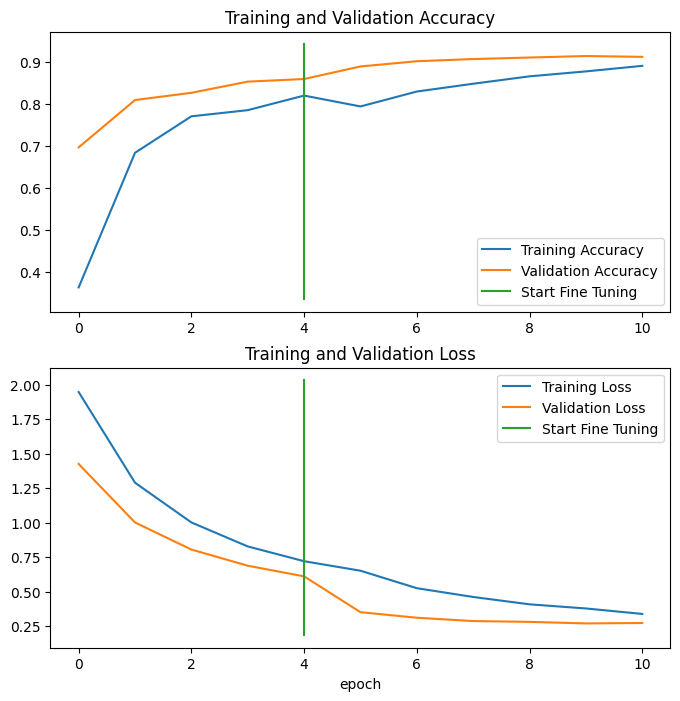

In [159]:
compare_historys(history_model_2, history_model_4)

## THANK YOU!!